<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_3/rascunho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from datetime import datetime

In [2]:
casos_full = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/caso_full.csv.gz?raw=true", 
                         compression = "gzip")

casos_full.loc[:,"date"] = pd.to_datetime(casos_full.loc[:,"date"], format = "%Y-%m-%d")

casos_full = casos_full[casos_full.date != "2021-07-01"]

In [3]:
feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2020 = pd.DataFrame({
    "holiday" : "sp_novos",
    "ds" : pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [4]:
vac_estado = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/20210630_evolucao_aplicacao_doses.csv",
                              sep = ";")

vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de janeiro de ", "/01/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de fevereiro de ", "/02/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de março de ", "/03/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de abril de ", "/04/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de maio de ", "/05/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de junho de ", "/06/")

vac_estado.iloc[:,0] = pd.to_datetime(vac_estado.iloc[:,0], format = "%d/%m/%Y")

vac_estado = vac_estado.rename(columns = {"Dia de Data Registro Vacina": "date"})

In [5]:
vac_sp = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/sao_paulo.xlsx?raw=true")
vac_sp = vac_sp[:-1]

vac_osa = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/osasco.xlsx?raw=true")
vac_osa = vac_osa[:-1]

vac_gru = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/guarulhos.xlsx?raw=true")
vac_gru = vac_gru[:-1]

vac_sbc = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/sbc.xlsx?raw=true")
vac_sbc = vac_sbc[:-1]

vac_fm = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/francisco_morato.xlsx?raw=true")
vac_fm = vac_fm[:-1]

vac_tab = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/taboao.xlsx?raw=true")
vac_tab = vac_tab[:-1]

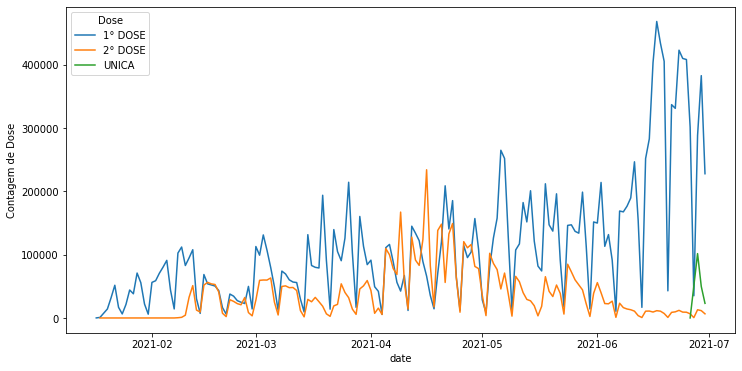

In [6]:
plt.figure(figsize=(12,6))

sns.lineplot(data = vac_estado, x = "date", y = "Contagem de Dose", hue = "Dose")

In [7]:
doses_soma = vac_estado.groupby("date").sum().reset_index()

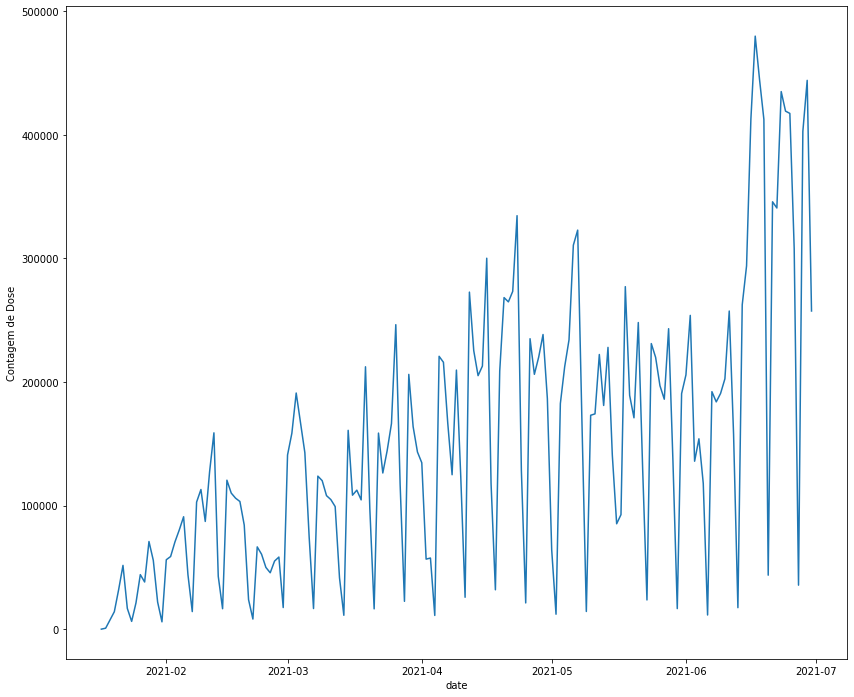

In [8]:
plt.figure(figsize = (14,12))
sns.lineplot(data = doses_soma, x = "date", y = "Contagem de Dose")

In [9]:
df_doses = pd.DataFrame()

df_doses.loc[:,"ds"] = doses_soma.loc[:,"date"] # esse aporte de novas vacinas foi muito importante para retomar a aceleração!
df_doses.loc[:,"y"] = doses_soma.loc[:,"Contagem de Dose"]

df_doses_teste = pd.DataFrame()

df_doses_teste.loc[:,"ds"] = doses_soma.loc[:,"date"][149:]
df_doses_teste.loc[:,"y"] = doses_soma.loc[:,"Contagem de Dose"][149:]

df_doses

,ds,y
0,2021-01-17,100
1,2021-01-18,879
2,2021-01-19,7451
3,2021-01-20,14193
4,2021-01-21,32109
...,...,...
160,2021-06-26,307998
161,2021-06-27,35674
162,2021-06-28,402763
163,2021-06-29,444026


In [10]:
doses_soma.loc[:,"soma"] = doses_soma.loc[:,"Contagem de Dose"].cumsum()
doses_soma

,date,Contagem de Dose,soma
0,2021-01-17,100,100
1,2021-01-18,879,979
2,2021-01-19,7451,8430
3,2021-01-20,14193,22623
4,2021-01-21,32109,54732
...,...,...,...
160,2021-06-26,307998,23447232
161,2021-06-27,35674,23482906
162,2021-06-28,402763,23885669
163,2021-06-29,444026,24329695


In [11]:
df_doses_soma = pd.DataFrame()

df_doses_soma.loc[:,"ds"] = doses_soma.loc[:,"date"] # esse aporte de novas vacinas foi muito importante para retomar a aceleração!
df_doses_soma.loc[:,"y"] = doses_soma.loc[:,"soma"]

df_doses_soma_teste = pd.DataFrame()

df_doses_soma_teste.loc[:,"ds"] = doses_soma.loc[:,"date"][149:]
df_doses_soma_teste.loc[:,"y"] = doses_soma.loc[:,"soma"][149:]

df_doses_soma

,ds,y
0,2021-01-17,100
1,2021-01-18,979
2,2021-01-19,8430
3,2021-01-20,22623
4,2021-01-21,54732
...,...,...
160,2021-06-26,23447232
161,2021-06-27,23482906
162,2021-06-28,23885669
163,2021-06-29,24329695


In [12]:
# m7 = Prophet(growth = "logistic", changepoint_prior_scale = 0.1)

# m7.fit(df_doses_soma)
# df_prev7 = m7.make_future_dataframe(periods = 365)
# df_prev7.loc[:,"cap"] = [pop_sp*2] * (165 + 365)

# prev7 = m7.predict(df_prev7)

# m7.plot(prev7, figsize = (20,10));
# # plt.plot(df_doses_teste.loc[:,"ds"], df_doses_teste.loc[:,"y"], "r.")

# Dinamicas nas cidades pendulo

(dá trabalho mas fica mais organizado)

In [57]:
df_sp = casos_full.query("city == 'São Paulo'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_sp.loc[:,"ma_cases"] = df_sp.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_sp.loc[:,"ma_deaths"] = df_sp.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_osa = casos_full.query("city == 'Osasco'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_osa.loc[:,"ma_cases"] = df_osa.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_osa.loc[:,"ma_deaths"] = df_osa.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_gru = casos_full.query("city == 'Guarulhos'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_gru.loc[:,"ma_cases"] = df_gru.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_gru.loc[:,"ma_deaths"] = df_gru.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_sbc = casos_full.query("city == 'São Bernardo do Campo'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_sbc.loc[:,"ma_cases"] = df_sbc.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_sbc.loc[:,"ma_deaths"] = df_sbc.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_fm = casos_full.query("city == 'Francisco Morato'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_fm.loc[:,"ma_cases"] = df_fm.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_fm.loc[:,"ma_deaths"] = df_fm.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_tab = casos_full.query("city == 'Taboão da Serra'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_tab.loc[:,"ma_cases"] = df_tab.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_tab.loc[:,"ma_deaths"] = df_tab.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

In [58]:
df_cities = pd.concat([df_sp, df_osa, df_gru, df_sbc, df_fm, df_tab],
                  axis = 0, join = 'inner', keys = ["São Paulo","Osasco","Guarulhos",
                                                    "São Bernando do Campo", "Francisco Morato",
                                                    "Taboão da Serra"]).reset_index()

df_cities.drop("level_1", axis = 1, inplace = True)

df_cities.rename(columns = {'level_0':'cidade'}, inplace=True)

df_cities

,cidade,date,new_confirmed,new_deaths,last_available_confirmed,last_available_deaths,estimated_population,ma_cases,ma_deaths
0,São Paulo,2020-02-25,1,0,1,0,12325232.0,NaN,NaN
1,São Paulo,2020-02-26,0,0,1,0,12325232.0,NaN,NaN
2,São Paulo,2020-02-27,0,0,1,0,12325232.0,NaN,NaN
3,São Paulo,2020-02-28,1,0,2,0,12325232.0,NaN,NaN
4,São Paulo,2020-02-29,0,0,2,0,12325232.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2818,Taboão da Serra,2021-06-26,57,3,17127,814,293652.0,40.285714,2.428571
2819,Taboão da Serra,2021-06-27,33,0,17160,814,293652.0,39.857143,2.428571
2820,Taboão da Serra,2021-06-28,10,1,17170,815,293652.0,36.428571,2.571429
2821,Taboão da Serra,2021-06-29,0,0,17170,815,293652.0,28.857143,2.000000


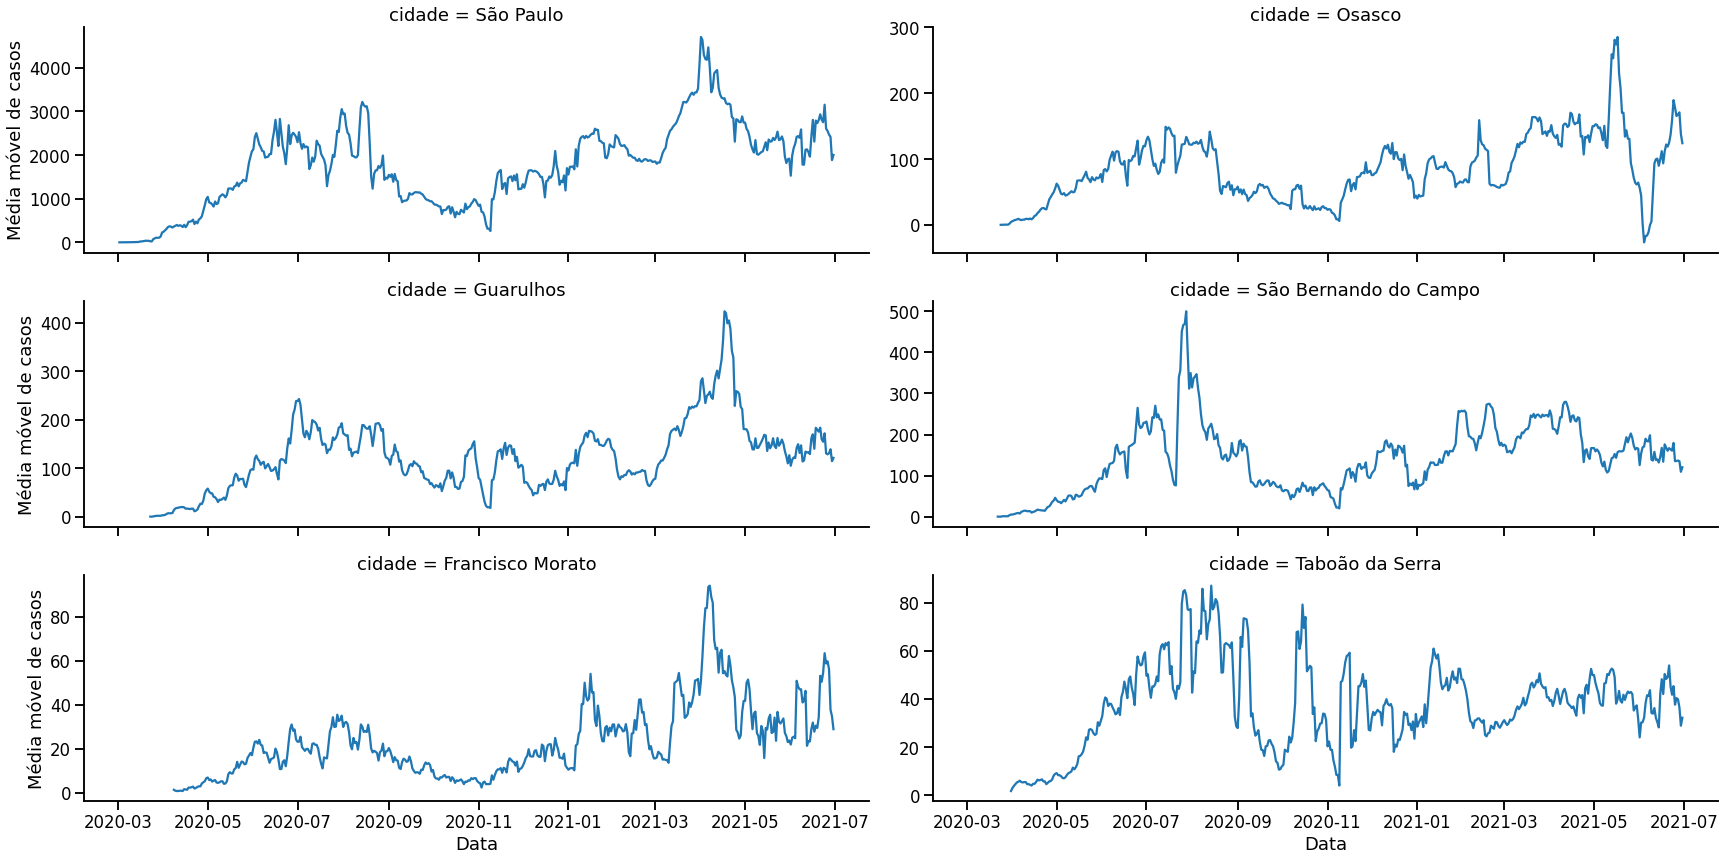

In [59]:
sns.set_context("talk")
g = sns.FacetGrid(data = df_cities, col = "cidade", col_wrap = 2, sharey = False, height = 4, aspect = 3)
g.map_dataframe(sns.lineplot, x = "date", y = "ma_cases")
g.set_axis_labels("Data", "Média móvel de casos")

# g.fig.set_figwidth(20)
# g.fig.set_figheight(10)
# type(g)

## Casos

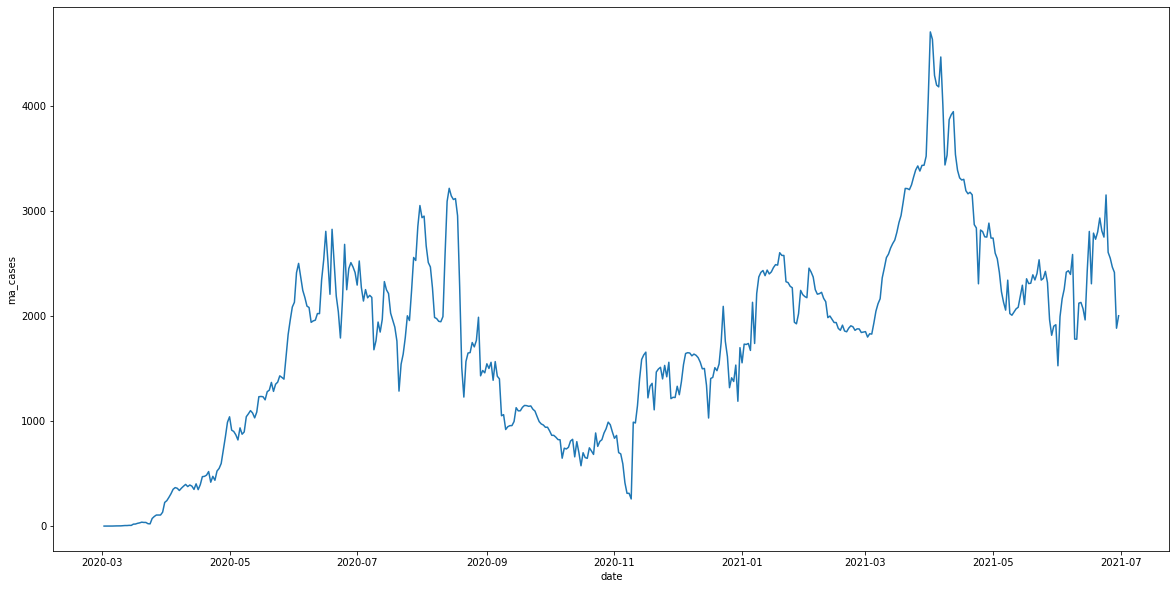

In [17]:
df_means = pd.DataFrame()
df_means.loc[:,"data"] = df_sp.loc[:,"date"]

df_sp.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()

plt.figure(figsize = (20, 10))
sns.lineplot(data = df_sp, x = "date", y = "ma_cases")

## Mortes

## Analise de correlação

Vamos brincar de fazer média movel:

In [18]:
# mas_sp = pd.DataFrame()

# mas_sp.loc[:,"date"] = cidade_sp.loc[:,"date"]
# mas_sp.loc[:,"moving_average_cases"] = cidade_sp.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
# mas_sp.loc[:,"moving_average_deaths"] = cidade_sp.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

NameError: ignored

In [ ]:
# plt.figure(figsize=(20,10))
# sns.lineplot(data = mas_sp, x = mas_sp.loc[:,"date"], y = mas_sp.loc[:,"moving_average_cases"])

# Vacinação

# Estado

# Cidades

## Taxas diárias

## Cumulativo

# Previsões

## Taxas diarias

## Cumulativo